# Heat Engine Lab

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Data

## Declare the variables

In [13]:
H = np.array([.014, .01, .056, .058, .004])
Volume = np.array([.000368445, .000365127, .000403288, .000404947, .00036015])
T = np.array([19.2, 19, 44.2, 44.2, 19.5])
T += 273.15
P = np.array([420, 1020, 1060, 590, 400])
P += 1000
D = .0325
A = .000829577
T_h = 46.64173
H_start = .07
H_end = .057
time_leak = 300
leak_rate = (H_start - H_end) / time_leak
print(leak_rate)
g = 9.8
rho = 1.0
p_atm = 85 * 1e3 
mass = 50 * 1e-3
V_can = .000313076
V_tube = .00622
D_piston = .0325
A_piston = .000829577
Ideal_gas_constant = 287
cp_air = 1

0.06981000000000001


## Import Data from csv

In [3]:
file_name = "data/heat_engine_data.csv"
data = np.genfromtxt(file_name, delimiter=",", names=True)

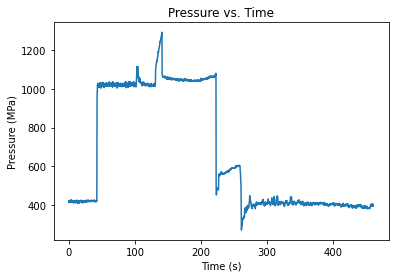

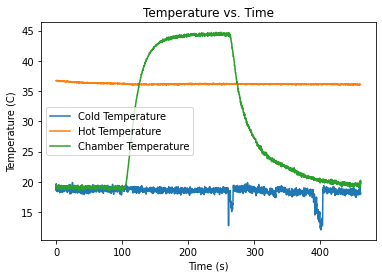

In [4]:
fig1, ax1 = plt.subplots()
ax1.plot(data["Time"], data["Pressure_Mpa"])
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Pressure (MPa)")
ax1.set_title("Pressure vs. Time")

fig2, ax2 = plt.subplots()
ax2.plot(data["Time"], data["Cold_Temp_C"])
ax2.plot(data["Time"], data["Hot_Temp_C"])
ax2.plot(data["Time"], data["Chamber_Temp"])
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Temperature (C)")
ax2.set_title("Temperature vs. Time")
ax2.legend(["Cold Temperature", "Hot Temperature", "Chamber Temperature"])


## Find times of change in temperature and Pressure

In [5]:
# can use np.nonzero(data >= threshold) 
# will give the indices where the data is greater than the threshold
threshold_1 = np.nonzero(data["Pressure_Mpa"] >= 450)[0][0]
time_threshold_1 = data["Time"][threshold_1]
print(f"First trial start time: {time_threshold_1}")
threshold_2 = np.nonzero(data["Chamber_Temp"] >= 22)[0][0]
time_threshold_2 = data["Time"][threshold_2]
print(f"Second trial start time: {time_threshold_2}")
time_greater_200 = np.nonzero(data["Time"] >= 200)[0]
first_grater_200 = time_greater_200[0]
threshold_time = data["Pressure_Mpa"][time_greater_200]
threshold_3 = np.nonzero(threshold_time <= 1000)[0][0]
time_threshold_3 = data["Time"][threshold_3 + first_grater_200]
print(f"Third trial start time: {time_threshold_3}")
temp_threshold_time = data["Chamber_Temp"][time_greater_200]
threshold_4 = np.nonzero(temp_threshold_time <= 40)[0][0]
time_threshold_4 = data["Time"][threshold_4 + first_grater_200]
print(f"Fourth trial start time: {time_threshold_4}")

First trial start time: 42.287
Second trial start time: 108.567
Third trial start time: 222.636
Fourth trial start time: 269.216


# Theoretical Calculations

Volume 1: 0.000368445 m^3
Pressure 1: 85414.593507 Pa
Temperature cold: 291.759395 K
Temperature hot: 309.839819 K
Mass of piston: 0.03509563650576928 g
Pressure 2: 86005.25597715045 Pa
Volume 2: 0.0003659146123935449 m^3
Pressure 3: 86005.25597715045 Pa
Volume 3: 0.0003885904591811726 m^3
Pressure 4: 85414.593507 Pa
Volume 4: 0.0003912776557253795 m^3
Top: 1.2550285722214143
Bottom: 39.5875427300094
Theoretical efficiency: 0.03170261364239811


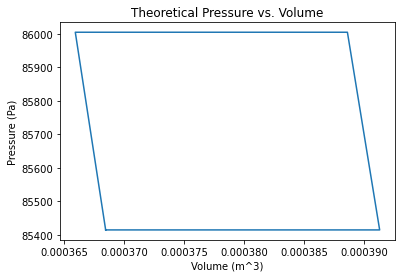

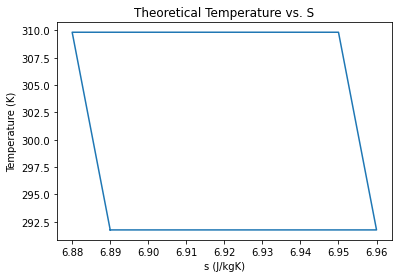

In [6]:
# mass of piston
start_pressure = data["Pressure_Mpa"][0] 
volume_1 = Volume[0]
print(f"Volume 1: {volume_1} m^3")
mass_piston = (start_pressure) * A / g 
pressure_1 = p_atm + mass_piston * g / A
print(f"Pressure 1: {pressure_1 } Pa")
Temperature_cold = data["Cold_Temp_C"][0] + 273.15
Temperature_hot = data["Hot_Temp_C"][0] + 273.15
print(f"Temperature cold: {Temperature_cold} K")
print(f"Temperature hot: {Temperature_hot} K")
print(f"Mass of piston: {mass_piston} g")
pressure_2 = p_atm + (mass_piston + mass) * g / A
print(f"Pressure 2: {pressure_2} Pa")
volume_2 = pressure_1 / pressure_2 * volume_1
print(f"Volume 2: {volume_2} m^3")
pressure_3 = pressure_2 + 0.
volume_3 = volume_2 * (Temperature_hot) / (Temperature_cold)
print(f"Pressure 3: {pressure_3} Pa")
print(f"Volume 3: {volume_3} m^3")
pressure_4 = pressure_1 + 0.
volume_4 = volume_3 * pressure_3 / pressure_4
print(f"Pressure 4: {pressure_4} Pa")
print(f"Volume 4: {volume_4} m^3")
val = np.log(volume_2 / volume_1)
top = mass_piston * Ideal_gas_constant *(Temperature_cold - Temperature_hot)* np.log(volume_2 / volume_1)
print(f"Top: {top}")
bottom = cp_air*(Temperature_hot - Temperature_cold) - mass_piston * Ideal_gas_constant * np.log(volume_2 / volume_1) * Temperature_hot
print(f"Bottom: {bottom}")
theo_eta = top / bottom
print(f"Theoretical efficiency: {theo_eta}")
theo_fig1, theo_ax1 = plt.subplots()
x_1 = [volume_1, volume_2, volume_3, volume_4, volume_1]
y_1 = [pressure_1, pressure_2, pressure_3, pressure_4, pressure_1]
theo_ax1.set_xlabel("Volume (m^3)")
theo_ax1.set_ylabel("Pressure (Pa)")
theo_ax1.set_title("Theoretical Pressure vs. Volume")
theo_ax1.plot(x_1, y_1)
theo_fig2, theo_ax2 = plt.subplots()
y_2 = [Temperature_cold, Temperature_hot, Temperature_hot, Temperature_cold, Temperature_cold]
x_2 = [6.89, 6.88, 6.95, 6.96, 6.89]
theo_ax2.set_ylabel("Temperature (K)")
theo_ax2.set_xlabel("s (J/kgK)")
theo_ax2.set_title("Theoretical Temperature vs. S")
theo_ax2.plot(x_2, y_2)


# Measured Values

Actual efficiency: 0.04197620104251713


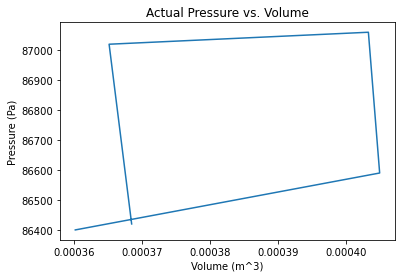

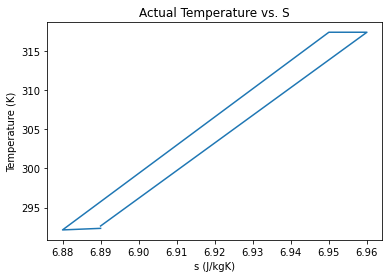

In [7]:
top_actual = mass_piston * Ideal_gas_constant * (T[4] - T[2]) * np.log(Volume[1]/ Volume[0])
bottom_actual = cp_air * (T[2] - T[4]) - mass_piston * Ideal_gas_constant * np.log(Volume[1] / Volume[0]) * T[3]
eta_actual = top_actual / bottom_actual
print(f"Actual efficiency: {eta_actual}")
actual_fig1, actual_ax1 = plt.subplots()
actual_ax1.set_xlabel("Volume (m^3)")
actual_ax1.set_ylabel("Pressure (Pa)")
actual_ax1.set_title("Actual Pressure vs. Volume")
actual_ax1.plot(Volume, P+p_atm)

actual_fig2, actual_ax2 = plt.subplots()
actual_ax2.set_ylabel("Temperature (K)")
actual_ax2.set_xlabel("s (J/kgK)")
actual_ax2.set_title("Actual Temperature vs. S")
actual_ax2.plot(x_2, T)

# Uncertainty Calculations
## Partial Derivative Calculations

In [11]:
# Partial derivative of Tc
top = Ideal_gas_constant**2 * np.log((A*H[1] +  V_tube + V_can)/ (A*H[0] + V_tube + V_can)) * mass
bottom = (cp_air * Temperature_cold + Ideal_gas_constant* np.log((A*H[1] + V_can + V_tube)/(A*H[0] + V_can + V_tube))* mass - Temperature_hot*cp_air)**2 
partial_Tc = top / bottom
# Partial derivative of Th
bottom = (cp_air * Temperature_hot + Ideal_gas_constant* np.log((A*H[1] + V_can + V_tube)/(A*H[0] + V_can + V_tube))* mass - Temperature_cold*cp_air)**2 
partial_Th = top / bottom
# Partial derivative of area
top = (H[1] - H[0]) * Ideal_gas_constant*(Temperature_hot-Temperature_cold)**2*(V_can + V_tube)*cp_air* mass
bottom = (H[0]*A + V_tube + V_can)*(Ideal_gas_constant*mass*np.log((H[1]*A + V_tube+ V_can)/(H[0]*A + V_tube+ V_can))+(Temperature_cold-Temperature_hot)*cp_air)**2
partial_A = top / bottom
# Partial derivative of Height 1
top = A * Ideal_gas_constant*(Temperature_hot-Temperature_cold)**2*(V_can + V_tube)*cp_air* mass
bottom = (H[0]*A + V_tube + V_can)*(Ideal_gas_constant*mass*np.log((H[1]*A + V_tube+ V_can)/(H[0]*A + V_tube+ V_can))+(Temperature_cold-Temperature_hot)*cp_air)**2
partial_H1 = top / bottom
# Partial derivative of Height 2
top = -A * Ideal_gas_constant*(Temperature_hot-Temperature_cold)**2*(V_can + V_tube)*cp_air* mass
bottom = (H[1]+V_tube + V_can)*(Ideal_gas_constant*mass*np.log((H[1]*A + V_tube+ V_can)/(H[0]*A + V_tube+ V_can))+(Temperature_cold-Temperature_hot)*cp_air)**2
partial_H2 = top / bottom
# partial derivatve of V_tube
top = A*(H[1] - H[0]) * Ideal_gas_constant*(Temperature_hot-Temperature_cold)**2*cp_air* mass
bottom = (V_tube + V_can + A * H[0])*(A* H[1] + V_tube + V_can)*(Ideal_gas_constant* mass * np.log((A*H[1] + V_tube + V_can)/(A*H[0] + V_tube + V_can)) + (Temperature_cold-Temperature_hot)*cp_air)**2
partial_Vt = top / bottom
# partial derivative of V_can
top = A*(H[1] - H[0]) * Ideal_gas_constant*(Temperature_hot-Temperature_cold)**2*cp_air* mass
bottom = (V_tube + V_can + A * H[0])*(A* H[1] + V_tube + V_can)*(Ideal_gas_constant* mass * np.log((A*H[1] + V_tube + V_can)/(A*H[0] + V_tube + V_can)) + (Temperature_cold-Temperature_hot)*cp_air)**2
partial_Vc = top / bottom
# partial derivative of mass
top = Ideal_gas_constant*(Temperature_hot-Temperature_cold)**2*np.log((A*H[1] + V_tube + V_can)/(A*H[0] + V_tube + V_can))*cp_air
bottom = (Ideal_gas_constant * np.log((A*H[1] + V_tube + V_can)/(A*H[0] + V_tube + V_can)) + (Temperature_cold-Temperature_hot)*cp_air)**2
partial_mass = top / bottom

## Uncertainty Propagation

In [12]:
canister_uncer = .000254 ** 2
caliper_uncertainty = .01
area_uncertainty = .1*1e-3
temp_uncertainty = .05
mass_uncer = .6*1e-3
height_uncer = .5 * 1e-3

Tc_u = partial_Tc * temp_uncertainty
Th_u = partial_Th * temp_uncertainty
area_u = partial_A * area_uncertainty
H1_u = partial_H1 * height_uncer
H2_u = partial_H2 * height_uncer
Vt_u = partial_Vt * canister_uncer
Vc_u = partial_Vc * canister_uncer
mass_u = partial_mass * mass_uncer

uncertinty = np.sqrt(Tc_u**2 + Th_u**2 + area_u**2 + H1_u**2 + H2_u**2 + Vt_u**2 + Vc_u**2 + mass_u**2)

print(f"Uncertainty of efficiency: {uncertinty}")

Uncertainty of efficiency: 0.00045997466048616607
